## Airline Passengers (Logistic Regression):

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

In [89]:
df=pd.read_csv('Airline Passengers.csv')
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [91]:
df['Years']=df['Month'].str.split(pat='-').str[1] #Splitting Year From Month Columns
df

,Month,Passengers,Years
0,1949-01,112,01
1,1949-02,118,02
2,1949-03,132,03
3,1949-04,129,04
4,1949-05,121,05
...,...,...,...
139,1960-08,606,08
140,1960-09,508,09
141,1960-10,461,10
142,1960-11,390,11


In [92]:
df2=df['Month']=df['Month'].str.split(pat='-').str[0]
df2

0      1949
1      1949
2      1949
3      1949
4      1949
       ... 
139    1960
140    1960
141    1960
142    1960
143    1960
Name: Month, Length: 144, dtype: object

In [93]:
df.rename(columns={'Month':'Years','Years':'Months'}, inplace=True)
df

,Years,Passengers,Months
0,1949,112,01
1,1949,118,02
2,1949,132,03
3,1949,129,04
4,1949,121,05
...,...,...,...
139,1960,606,08
140,1960,508,09
141,1960,461,10
142,1960,390,11


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Years       144 non-null    object
 1   Passengers  144 non-null    int64 
 2   Months      144 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.5+ KB


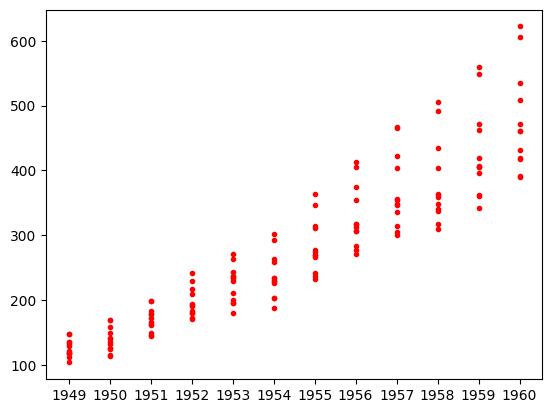

In [110]:
plt.scatter(df.Years,df.Passengers, marker='.', color='Red')

In [112]:
type(df[['Years']])

pandas.core.frame.DataFrame

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[['Years']],df.Passengers,test_size=0.1)  #0.1=10%

In [114]:
x_train

,Years
80,1955
21,1950
126,1959
121,1959
102,1957
...,...
67,1954
6,1949
83,1955
74,1955


In [115]:
x_test

,Years
119,1958
101,1957
139,1960
46,1952
104,1957
81,1955
22,1950
49,1953
12,1950
57,1953


In [116]:
y_train

80     312
21     133
126    548
121    342
102    465
      ... 
67     293
6      148
83     278
74     267
10     104
Name: Passengers, Length: 129, dtype: int64

In [117]:
y_test

119    337
101    422
139    606
46     172
104    404
81     274
22     114
49     196
12     115
57     211
88     318
34     146
132    417
16     125
85     277
Name: Passengers, dtype: int64

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [119]:
model.fit(x_train,y_train)

C:\Users\Abdul Sami Solangi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [122]:
model.predict([[150]])

C:\Users\Abdul Sami Solangi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([229])

In [123]:
model.score(x_test,y_test)

0.0

In [124]:
model.predict_proba(x_test)  # proba = Probability

array([[0.00772677, 0.00772677, 0.01547273, ..., 0.00776649, 0.00776649,
        0.00777046],
       [0.00772774, 0.00772774, 0.01546917, ..., 0.00776744, 0.00776744,
        0.00777141],
       [0.00772485, 0.00772485, 0.01547985, ..., 0.0077646 , 0.0077646 ,
        0.00776857],
       ...,
       [0.00772485, 0.00772485, 0.01547985, ..., 0.0077646 , 0.0077646 ,
        0.00776857],
       [0.00773447, 0.00773447, 0.01544426, ..., 0.00777406, 0.00777406,
        0.00777802],
       [0.0077287 , 0.0077287 , 0.01546561, ..., 0.00776839, 0.00776839,
        0.00777235]], shape=(15, 107))